# Current Vector Stack with ADCP Data

## Using Quiver3D in Matplotlib to generate a 3D representation of current in a single water column

For this visualization, we will require the northward and eastward components of the water velocity and the depth of each of these component vectors to generate a 3-dimensional hub and spoke plot.

In [1]:
# imports
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import datetime as d
import csv

In [2]:
# date adjustment constants; OOI portal timestamps from 1900, Python timestamps from 1970
seconds_per_year = 31557600
year_offset = 70

Note the difference in timestamp protocol between the OOI data portal and Python. OOI timestamps begin from 1900 while Python begins from 1970. Therefore, if we require readable dates in our final plot, we will need to subtract 70 years' worth of seconds from our data. These constants help to simplify this function.

But first, let's read in our data. This demonstration will use the csv format from the data portal. Due to this, we do not know where in the csv file our data of interest will be located. So, we create a dictionary to associate these unknown indexes with their datatypes.

In [3]:
# datatypes of interest, placeholder values
targetdict = {"bin":-1,"water_velocity_north":-1,"water_velocity_east":-1,"obs":-1,"cell_length":-1,"foo":-1}

# using test data
file = open("testcurrent.csv","r",newline="")
read = csv.reader(file,delimiter=",")

# isolate headings, assign key:index values
headings = next(read)
keys = list(targetdict.keys())

# if one of the headings is a key, record its index
for k in keys:
    if headings.count(k) == 0:
        del targetdict[k]
# if one of the keys is not in the datafile, remove it
    else:
        targetdict[k] = headings.index(k)    
    
print(targetdict)

{'bin': 0, 'water_velocity_north': 35, 'water_velocity_east': 34, 'obs': 1, 'cell_length': 5}


Now that we know where in the datafile our types of interest are located, we can compile them into a list before using Quiver3D to plot them. 

Side note: This demonstration only considers a single point in time. For our purposes, we will simply use the first datapoint available. To do so, we will only consider data for which obs = 0.

In [4]:
# only use datatypes where obs = 0
d = []
for row in read:
    if row[targetdict["obs"]] == "0":
        d.append(row)
file.close()

With the proper datapoints isolated, we can further simplify things by gleaning our selected datatypes with a few list compositions. Note that we are also casting these datatypes to their proper type. In an ideal case, we would use Python's csv module to recognize these types based off of quotechars. However, data from the OOI portal does not grant this possbility.

In [5]:
# convert cm to m
bin_size = float(d[0][targetdict["cell_length"]]) / 100
# convert mm to m
z_loc = [int(x[targetdict["bin"]]) * bin_size for x in d]
vx = [float(r[targetdict["water_velocity_east"]]) / 1000 for r in d]
vy = [float(r[targetdict["water_velocity_north"]]) / 1000 for r in d]

Finally, we plot our figure with Quiver3D

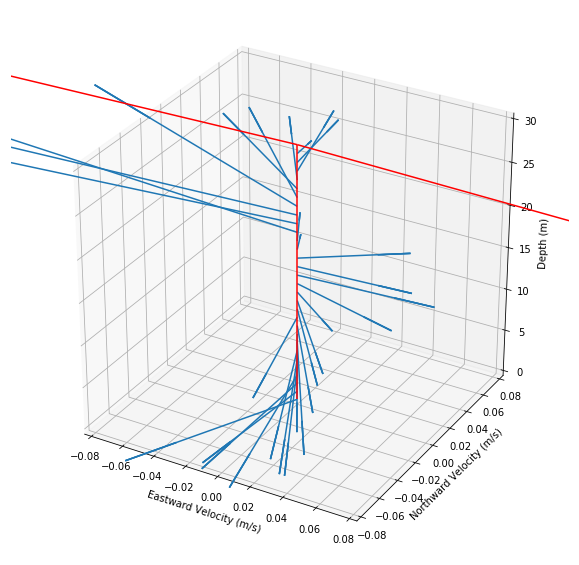

In [6]:
# set up figure
fig = plt.figure(figsize=(10,10))

# make it pretty and scaled for our data
ax = fig.add_subplot(111, projection='3d')
max_xy = max(vx + vy)
# number bins is equal to the length of any of the datatype lists
max_z = bin_size * len(vx)
ax.set_xlim(-max_xy,max_xy)
ax.set_ylim(-max_xy,max_xy)
ax.set_zlim(0, max_z)
ax.set_xlabel("Eastward Velocity (m/s)")
ax.set_ylabel("Northward Velocity (m/s)")
ax.set_zlabel("Depth (m)")

# plot central axis
# plot current vectors
ax.quiver(0,0,z_loc,vx,vy,0)
ax.quiver(0,0,0,0,0,max_z,color="red")